In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [140]:
data = pd.read_csv('../data/advertising.csv' , sep=',')
data
# dataset is about invesment in thousand of dollars on the medium and the results of getting sales in thousand of dollars

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [141]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [143]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


TV              Axes(0.125,0.53;0.352273x0.35)
radio        Axes(0.547727,0.53;0.352273x0.35)
newspaper       Axes(0.125,0.11;0.352273x0.35)
sales        Axes(0.547727,0.11;0.352273x0.35)
dtype: object

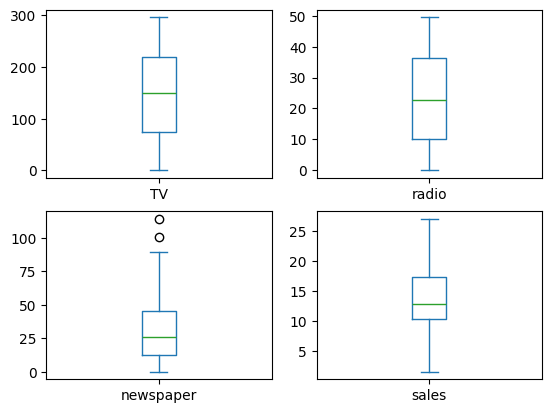

In [144]:
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

In [145]:
# remove outlier by clipping
def remove_outlier_clipping(dataframe,lower_quantile,upper_quantile):
    df=dataframe.copy()
    for col in df.columns:
        if df[col].dtype != 'object':
            df[col] = df[col].clip(lower=df[col].quantile(lower_quantile), upper=df[col].quantile(upper_quantile))
    return df

In [146]:
df=remove_outlier_clipping(data,0.05,0.95)

In [147]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,146.929000,23.217250,30.035250,14.035000
std,84.753182,14.621118,20.081675,4.923442
min,13.195000,1.995000,3.600000,6.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,280.735000,46.810000,71.825000,23.800000


TV              Axes(0.125,0.53;0.352273x0.35)
radio        Axes(0.547727,0.53;0.352273x0.35)
newspaper       Axes(0.125,0.11;0.352273x0.35)
sales        Axes(0.547727,0.11;0.352273x0.35)
dtype: object

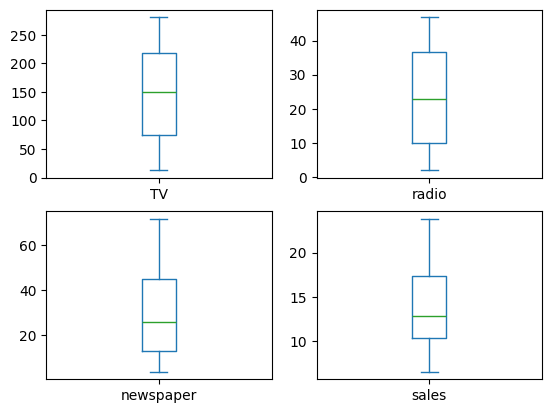

In [148]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

In [149]:
target = df['sales']
features = df.drop('sales', axis=1)

In [150]:

def train_val_test_split_manual(X, y, train_size=0.7, val_size=0.15, test_size=0.15, random_state=None):
    # Ensure the sum of train_size, val_size, and test_size is 1
    if train_size + val_size + test_size != 1:
        raise ValueError("The sum of train_size, val_size, and test_size must be 1.")
    
    # Set the random seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)
    
    # Get the number of samples
    num_samples = X.shape[0]
    
    # Shuffle the indices to ensure random splitting
    indices = np.random.permutation(num_samples)
    
    # Calculate the split indices
    train_end = int(train_size * num_samples)
    val_end = int((train_size + val_size) * num_samples)
    
    # Split the indices into train, validation, and test
    train_indices = indices[:train_end]
    val_indices = indices[train_end:val_end]
    test_indices = indices[val_end:]
    
    # Split the data into training, validation, and test sets using the indices
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    return X_train, X_val, X_test, y_train, y_val, y_test



In [151]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split_manual(features.values, target.values)

# Checking the sizes
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Validation Set Size: {X_val.shape[0]}")
print(f"Test Set Size: {X_test.shape[0]}")


Training Set Size: 140
Validation Set Size: 30
Test Set Size: 30


In [152]:
model= LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [153]:
y_val_pred = model.predict(X_val)

In [154]:
mse_val= mean_squared_error(y_val, y_val_pred)
r2_val= r2_score(y_val, y_val_pred)


print(f"Mean Squared Error (Validation): {mse_val}")
print(f"R^2 Score (Validation): {r2_val}")


Mean Squared Error (Validation): 2.19150846748277
R^2 Score (Validation): 0.805653011562683


In [155]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test R-squared: {r2_test}")


Test MSE: 3.076297259794923
Test R-squared: 0.8885900081197243


In [156]:
import joblib
joblib.dump(model, '../models/sales_model.pkl')


['../models/sales_model.pkl']

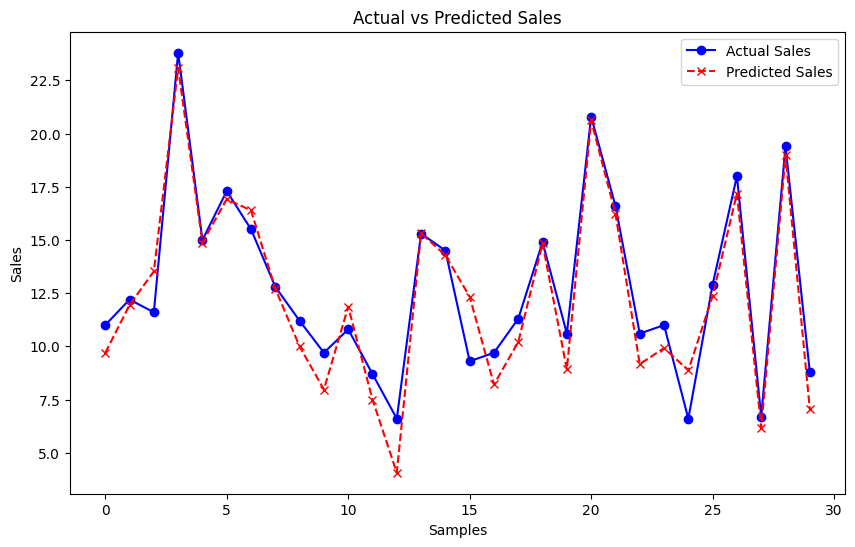

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Sales', marker='o', linestyle='-', color='blue')
plt.plot(y_test_pred, label='Predicted Sales', marker='x', linestyle='--', color='red')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()
